# Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(rc={'figure.figsize':(5, 5)})

# Read Data

In [2]:
df = pd.read_csv("/datasets/world-happiness-report.csv")
df.head(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


# Explarotary Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [4]:
df["Country name"].value_counts()

Venezuela         15
Cameroon          15
Tanzania          15
Bangladesh        15
United Kingdom    15
                  ..
Suriname           1
Oman               1
Maldives           1
Cuba               1
Guyana             1
Name: Country name, Length: 166, dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1949.0,2013.216008,4.166828,2005.000,2010.00000,2013.0000,2017.000,2020.000
Life Ladder,1949.0,5.466705,1.115711,2.375,4.64000,5.3860,6.283,8.019
Log GDP per capita,1913.0,9.368453,1.154084,6.635,8.46400,9.4600,10.353,11.648
Social support,1936.0,0.812552,0.118482,0.290,0.74975,0.8355,0.905,0.987
Healthy life expectancy at birth,1894.0,63.359374,7.510245,32.300,58.68500,65.2000,68.590,77.100
Freedom to make life choices,1917.0,0.742558,0.142093,0.258,0.64700,0.7630,0.856,0.985
Generosity,1860.0,0.000103,0.162215,-0.335,-0.11300,-0.0255,0.091,0.698
Perceptions of corruption,1839.0,0.747125,0.186789,0.035,0.69000,0.8020,0.872,0.983
Positive affect,1927.0,0.710003,0.107100,0.322,0.62550,0.7220,0.799,0.944
Negative affect,1933.0,0.268544,0.085168,0.083,0.20600,0.2580,0.320,0.705


# Visualize Data & Preprocessing

In [6]:
from os import mkdir

In [7]:
try:
  mkdir("Plots")
except:
  pass

mypath = "Plots"

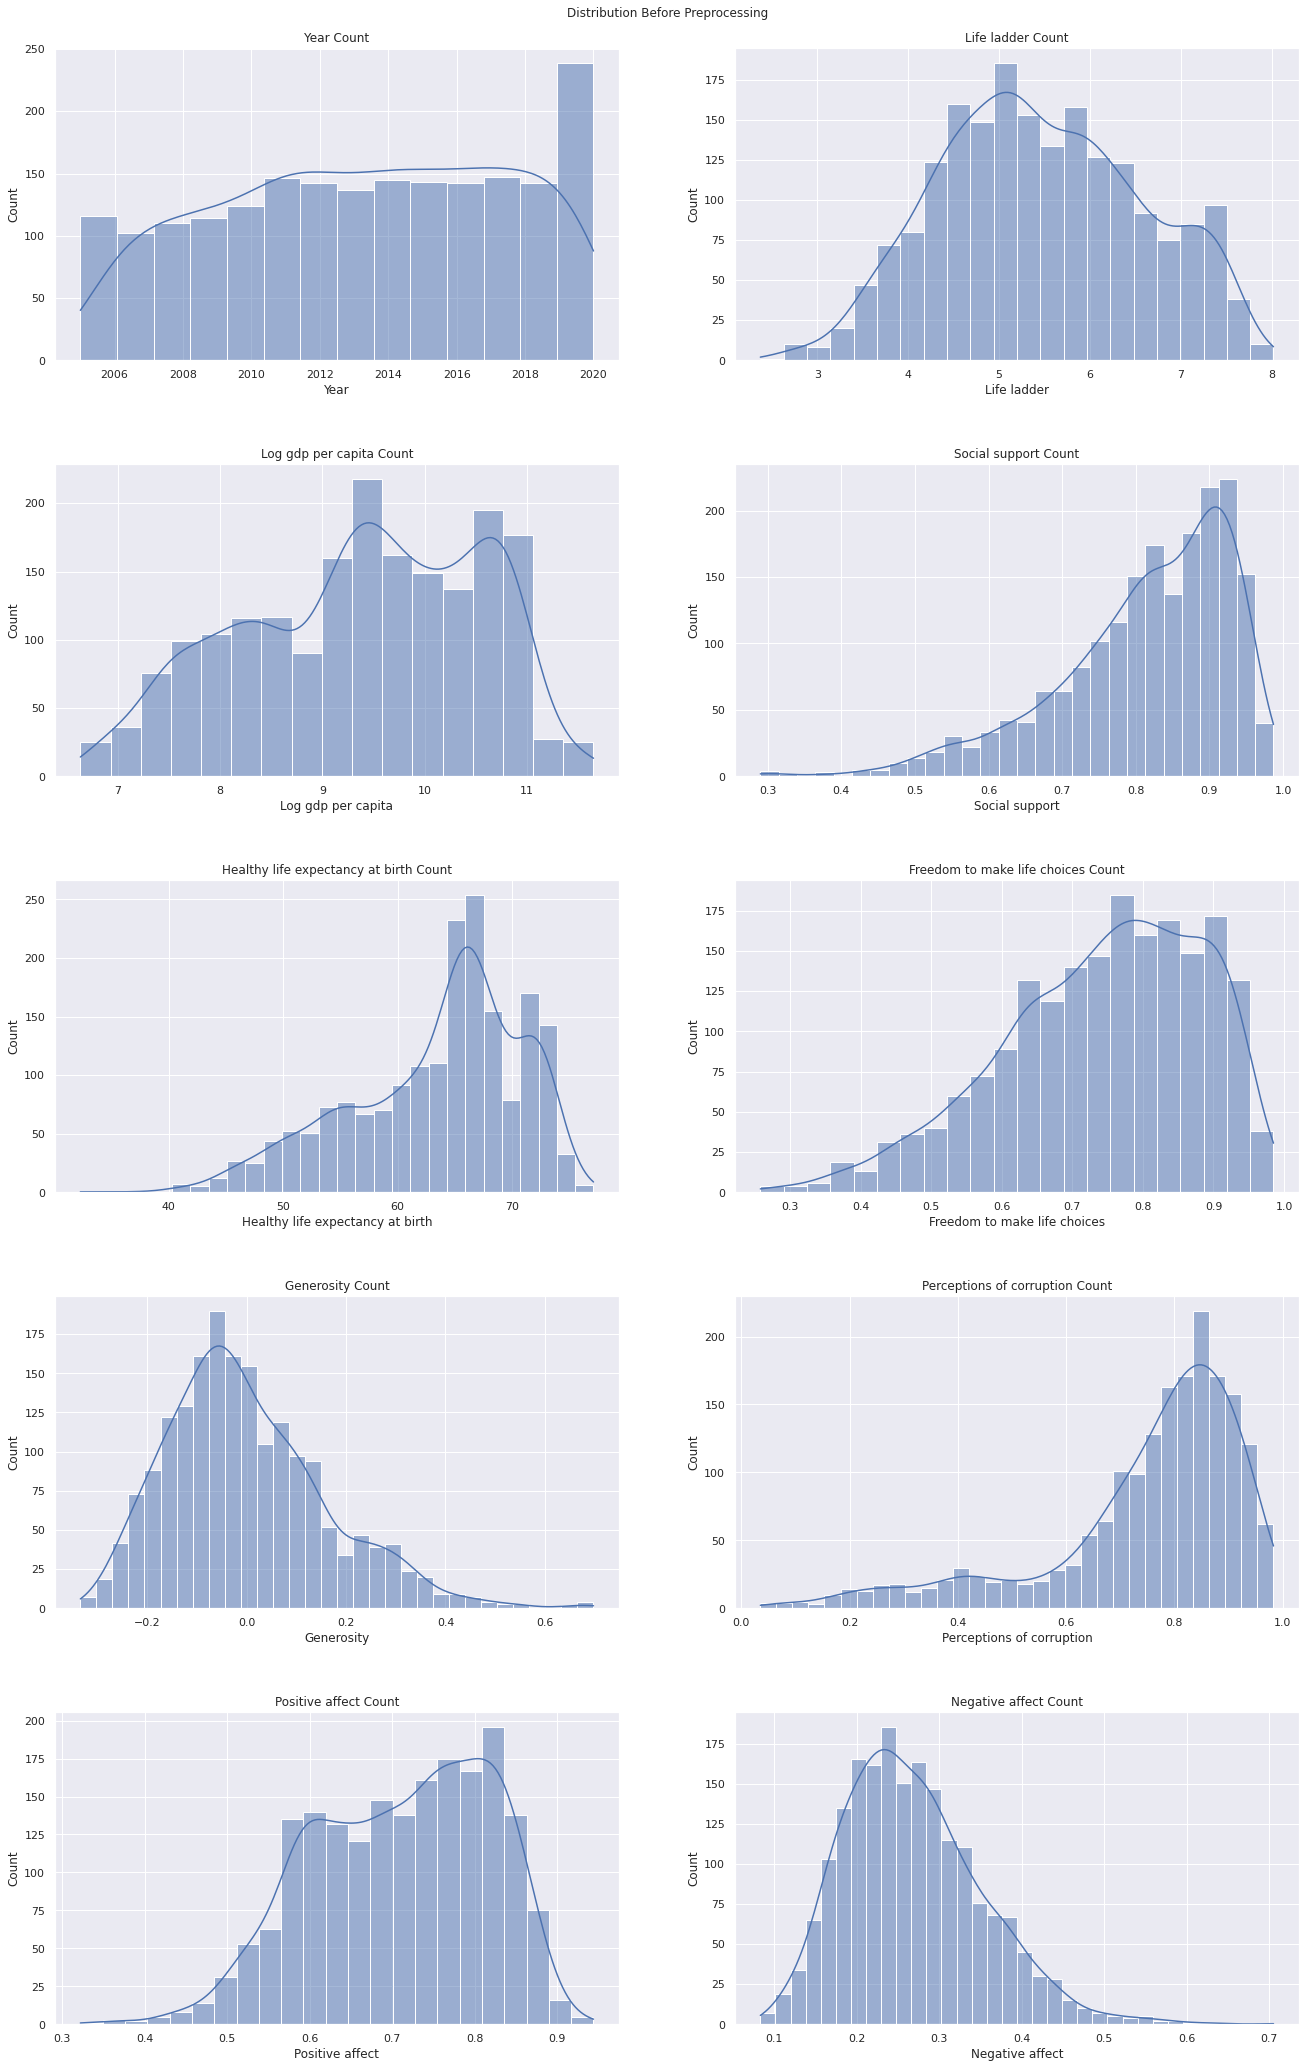

In [8]:
f, axes = plt.subplots(5,2, figsize = (20,30))
f.tight_layout(pad=8)
f.suptitle("Distribution Before Preprocessing")
cols = df.select_dtypes(exclude="object").columns

x_axis = 0
y_axis = 0

for col in cols:
  sns.histplot(data=df, x=col, kde=True, ax=axes[x_axis, y_axis])
  axes[x_axis,y_axis].set_xlabel(col.capitalize())
  axes[x_axis,y_axis].set_ylabel("Count")
  axes[x_axis,y_axis].set_title(f"{col.capitalize()} Count")
  if y_axis == 1:
    y_axis = 0
    x_axis += 1
    # continue
  else:
    y_axis += 1 

plt.savefig("Plots/Distribution_Before_Preprocessing.png")
plt.show()

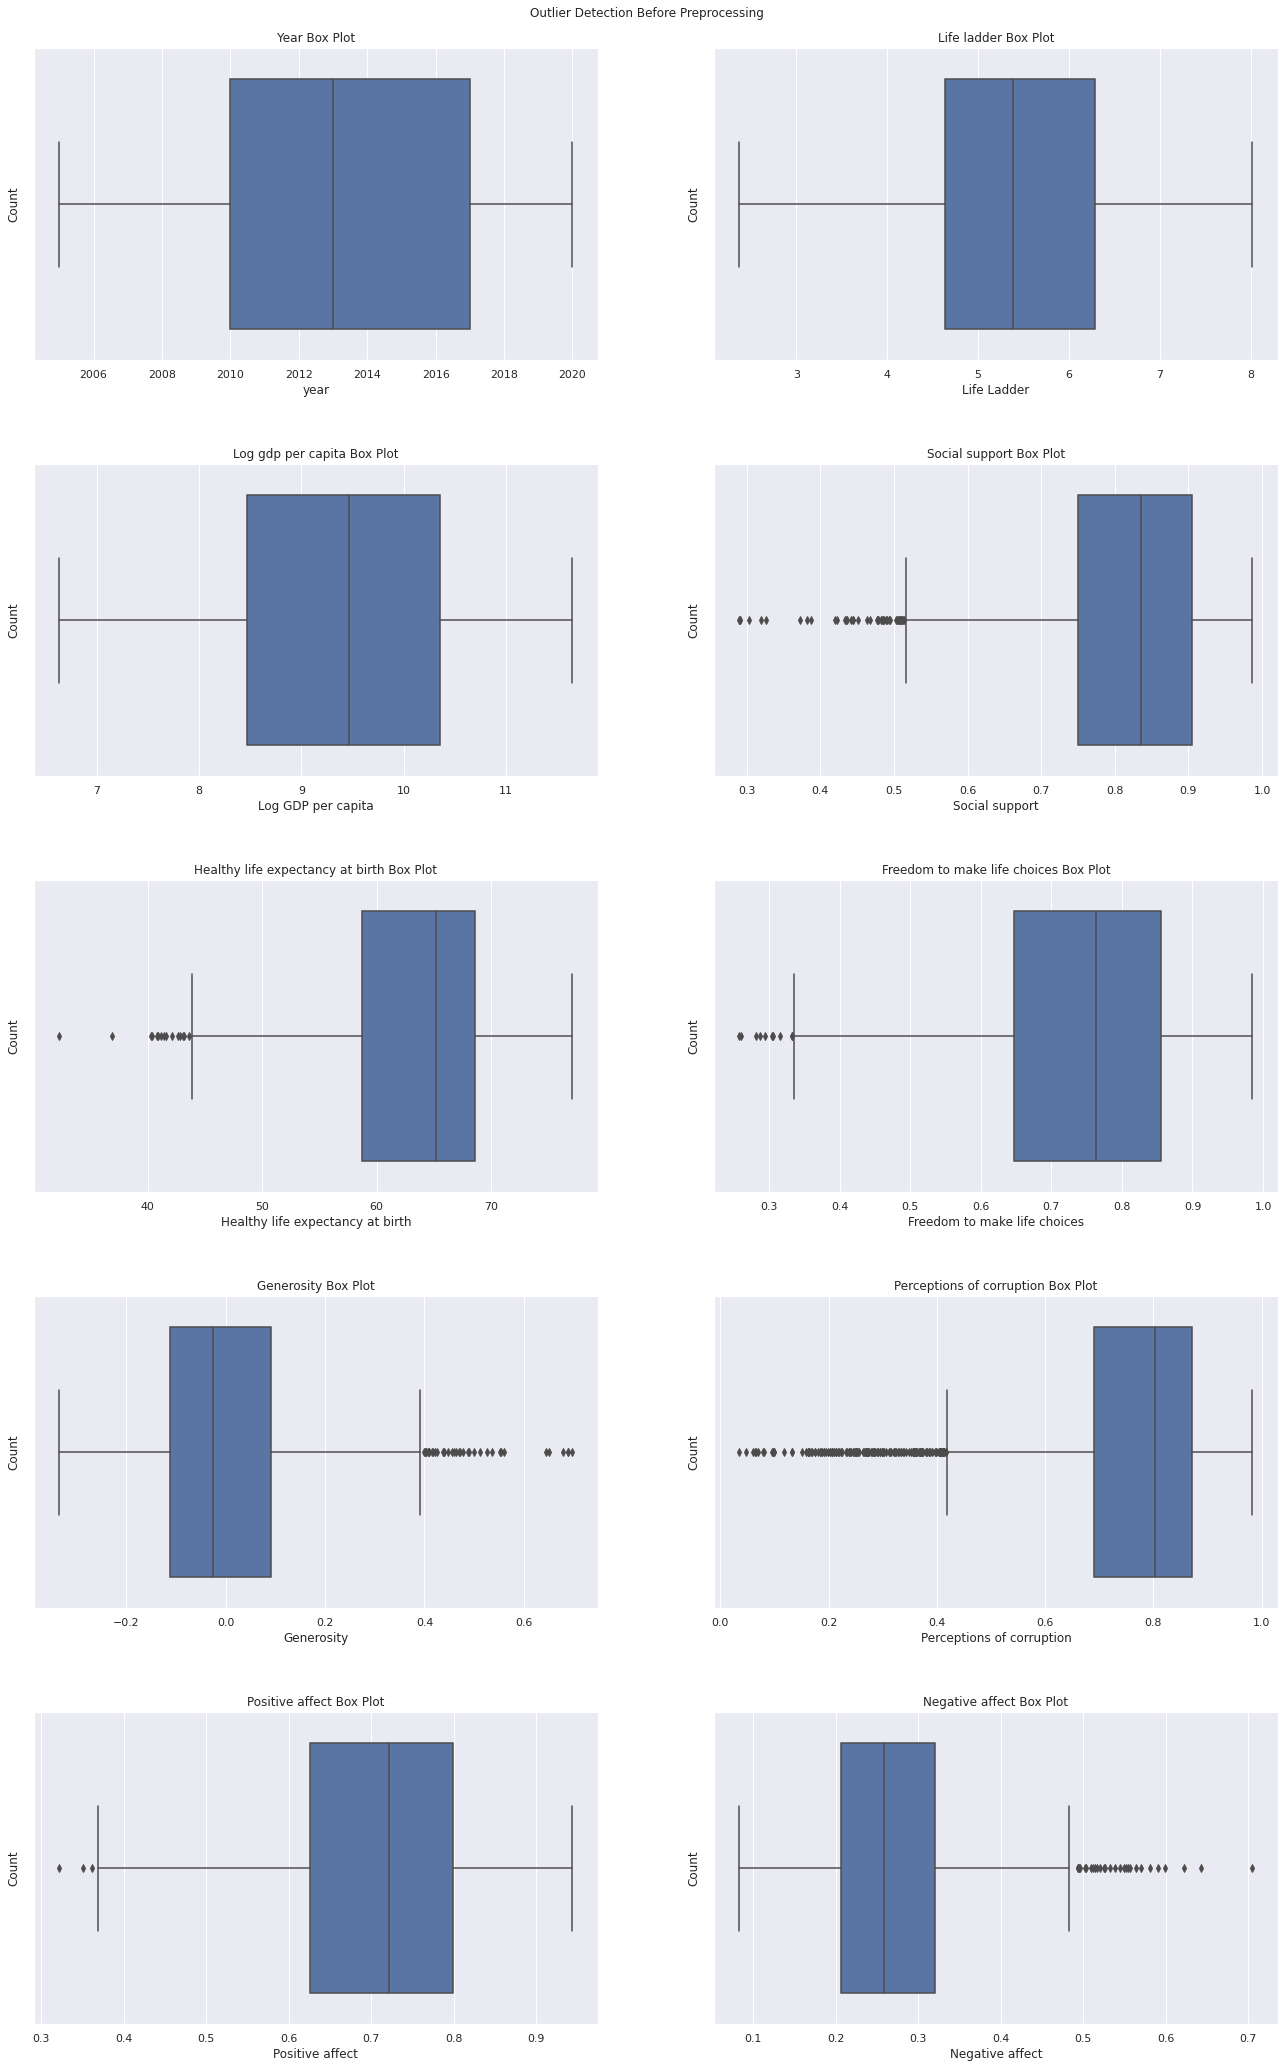

In [9]:
f, axes = plt.subplots(5,2, figsize = (20,30))
f.tight_layout(pad=8)
f.suptitle("Outlier Detection Before Preprocessing")
cols = df.select_dtypes(exclude="object").columns

x_axis = 0
y_axis = 0

for col in cols:
  sns.boxplot(data=df, x=col, ax=axes[x_axis, y_axis])
  axes[x_axis,y_axis].set_xlabel(col)
  axes[x_axis,y_axis].set_ylabel("Count")
  axes[x_axis,y_axis].set_title(f"{col.capitalize()} Box Plot")
  if y_axis == 1:
    y_axis = 0
    x_axis += 1
  else:
    y_axis += 1 

# plt.savefig("Plots/")
plt.show()

## Handle Outliers

In [10]:
import math

In [11]:
def isNaN(num):
    return num != num

In [12]:
df_2 = df.copy()

In [13]:
outlier_columns = ["Social support", "Healthy life expectancy at birth", 
                  "Freedom to make life choices", "Generosity",
                  "Perceptions of corruption", "Positive affect", "Negative affect"]

In [14]:
for column in outlier_columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  filter = (df_2[column] >= Q1 - 1.5 * IQR) & (df_2[column] <= Q3 + 1.5 *IQR)
  mean = df_2[column].loc[filter].mean()

  if mean is not np.nan:
    df_2.loc[~filter, column] = mean  # change outlier values with mean
  df_2.loc[df_2[column].apply(isNaN), column] = mean

In [15]:
df_cleaned = df_2.copy()

In [16]:
  Q1 = df["Perceptions of corruption"].quantile(0.25)
  Q3 = df["Perceptions of corruption"].quantile(0.75)
  IQR = Q3 - Q1

In [17]:
Q1 - 1.5 * IQR

0.41699999999999987

In [18]:
df_2["Log GDP per capita"].fillna(df_2["Log GDP per capita"].mean(), inplace=True)

In [19]:
df_2.isna().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

## Visualization After Outlier Handling

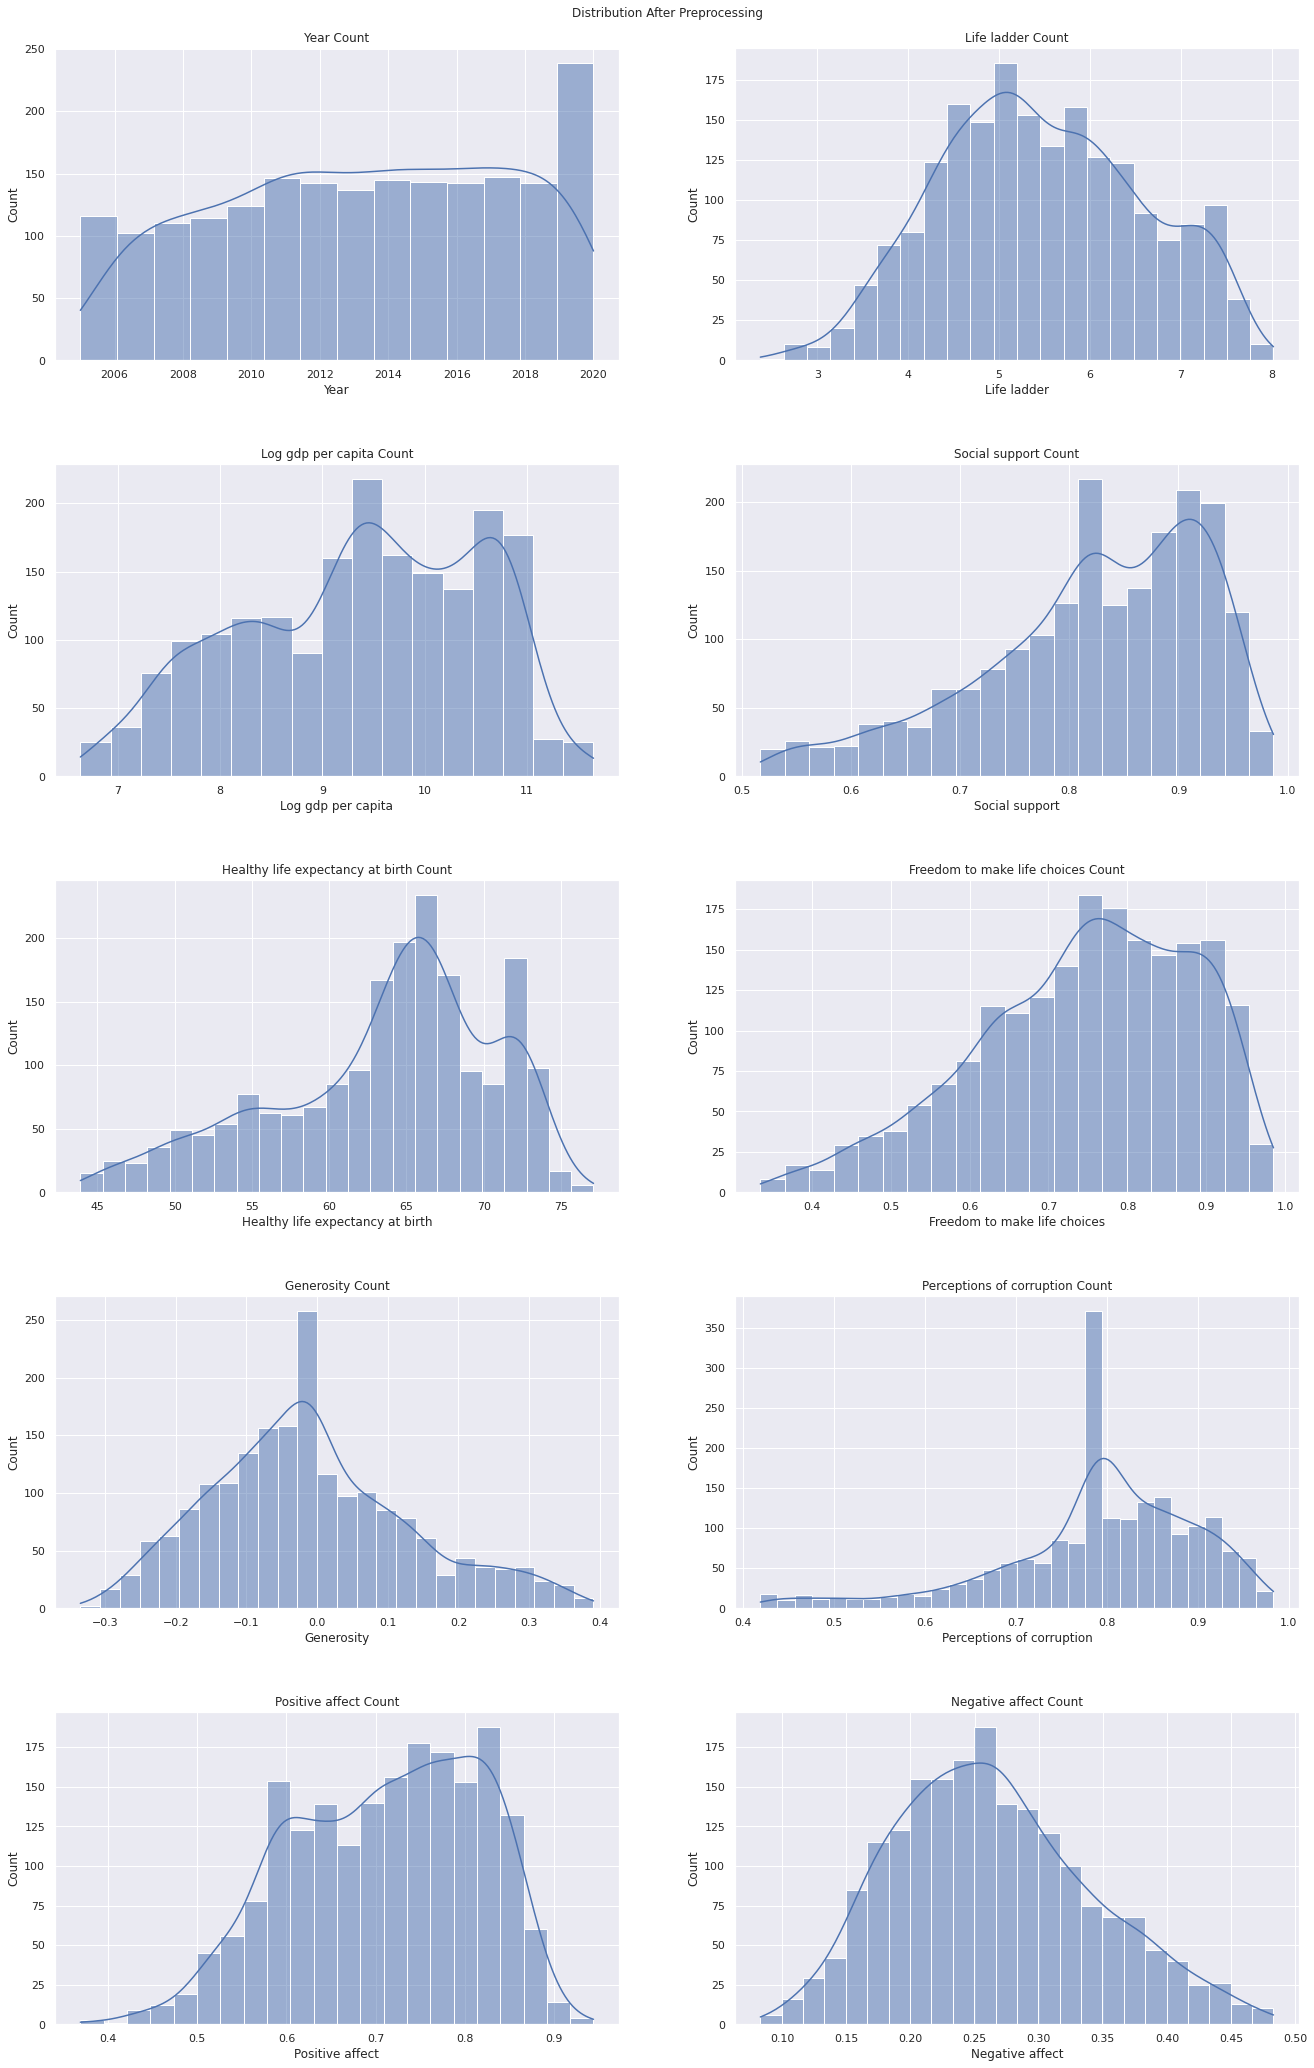

In [20]:
f, axes = plt.subplots(5,2, figsize = (20,30))
f.tight_layout(pad=8)
f.suptitle("Distribution After Preprocessing")
cols = df_cleaned.select_dtypes(exclude="object").columns

x_axis = 0
y_axis = 0

for col in cols:
  sns.histplot(data=df_cleaned, x=col, kde=True, ax=axes[x_axis, y_axis])
  axes[x_axis,y_axis].set_xlabel(col.capitalize())
  axes[x_axis,y_axis].set_ylabel("Count")
  axes[x_axis,y_axis].set_title(f"{col.capitalize()} Count")
  if y_axis == 1:
    y_axis = 0
    x_axis += 1
  else:
    y_axis += 1 

plt.savefig("Plots/Distribution_Report.png")
plt.show()

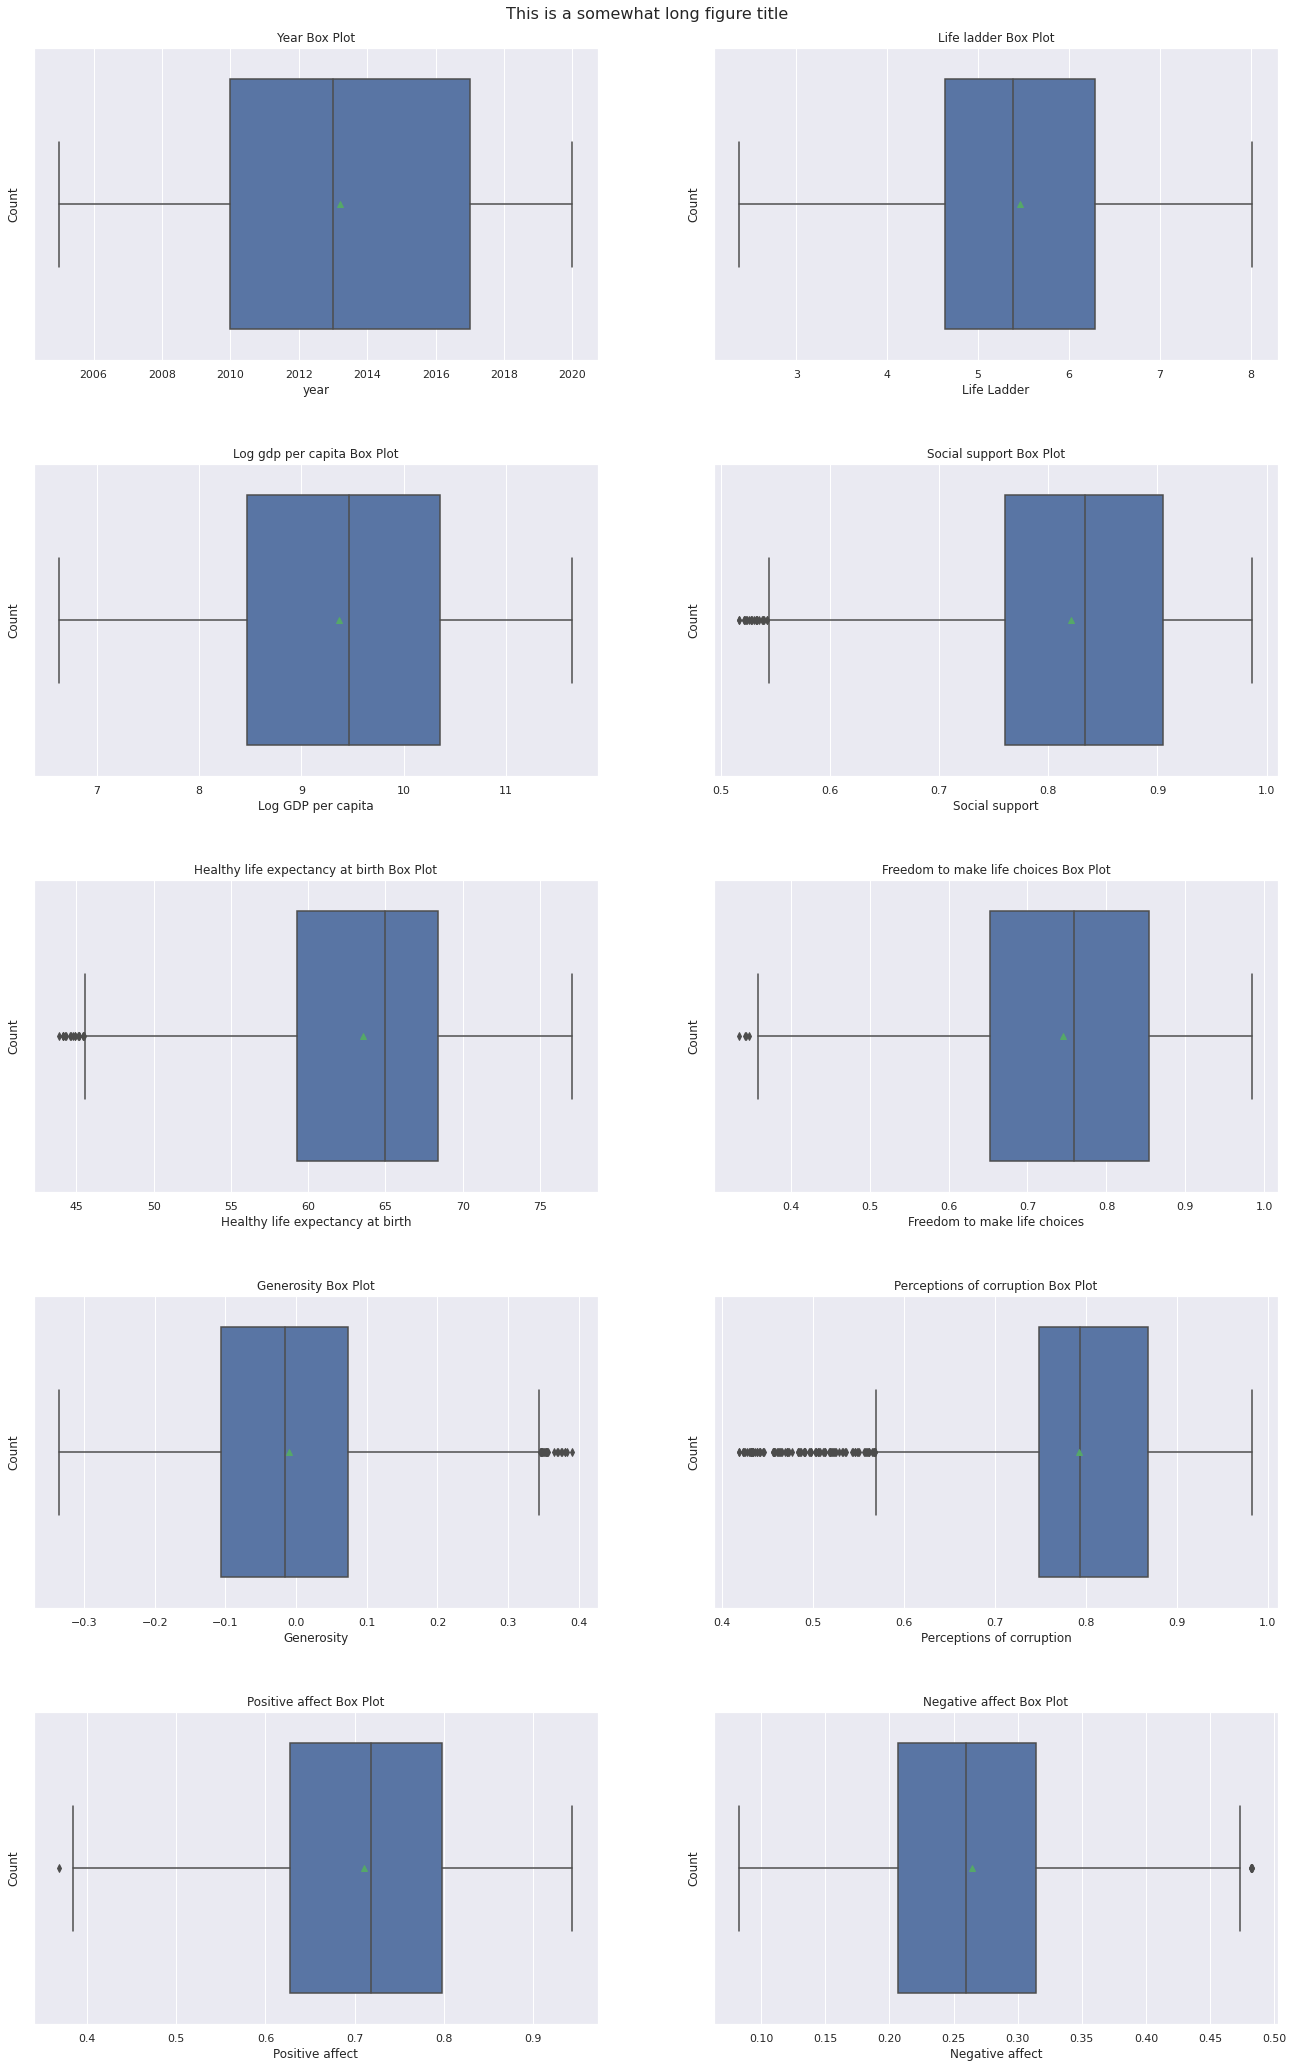

In [21]:
f, axes = plt.subplots(5,2, figsize = (20,30))
f.tight_layout(pad=8)
f.suptitle('This is a somewhat long figure title', fontsize=16)
cols = df_cleaned.select_dtypes(exclude="object").columns

x_axis = 0
y_axis = 0

for col in cols:
  sns.boxplot(data=df_cleaned, x=col, ax=axes[x_axis, y_axis], showmeans=True)
  axes[x_axis,y_axis].set_xlabel(col)
  axes[x_axis,y_axis].set_ylabel("Count")
  axes[x_axis,y_axis].set_title(f"{col.capitalize()} Box Plot")
  if y_axis == 1:
    y_axis = 0
    x_axis += 1
    # continue
  else:
    y_axis += 1 

plt.show()

In [22]:
df_cleaned.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

## Grouping Data By Year For Visualization

In [23]:
year_group = df_cleaned.groupby("year").sum()
year_group

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,,,,,,,,,
2005,174.049,273.204,24.230000,1809.200000,22.227787,0.004310,20.833991,20.174572,6.914336
2006,462.524,795.897,75.148698,5422.075031,65.958468,-0.397804,71.473575,63.999000,22.670336
2007,552.664,935.641,83.409245,6340.905789,70.615787,1.025320,83.500584,72.337572,25.522000
2008,596.036,1008.400,89.287942,6786.670031,77.244361,1.471959,88.368380,78.043717,26.790000
2009,622.174,1046.810,93.870698,7119.117274,78.965681,-1.625041,91.751779,80.499572,28.173336
2010,681.604,1155.443,103.445245,7874.045789,87.897787,-1.009721,98.985973,88.300289,29.938342
2011,791.916,1346.593,119.549942,9159.471063,107.323787,-3.852082,116.643964,102.436572,35.554007
2012,773.013,1314.683,115.196849,9000.862305,101.459787,-1.015804,113.813761,100.394000,36.256671
2013,739.055,1274.760,110.834849,8676.577031,99.738894,-1.643763,109.405371,97.531144,36.222007


## Save Plot as "png"

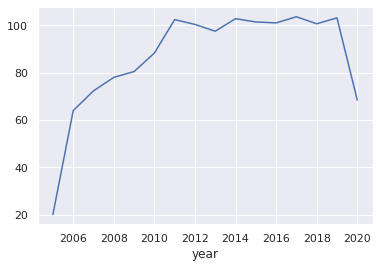

In [24]:
year_group["Positive affect"].plot()
plt.savefig("Plots/Positive_Affect_Plot.png")

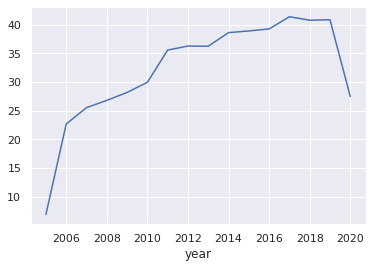

In [25]:
year_group["Negative affect"].plot()
plt.savefig("Plots/Negative_Affect_Plot.png")

In [26]:
df_cleaned["Country name"].value_counts()

Venezuela         15
Cameroon          15
Tanzania          15
Bangladesh        15
United Kingdom    15
                  ..
Suriname           1
Oman               1
Maldives           1
Cuba               1
Guyana             1
Name: Country name, Length: 166, dtype: int64

##  Scale Data

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
report_columns = ['Life Ladder', 'Log GDP per capita',
                  'Social support', 'Healthy life expectancy at birth',
                  'Freedom to make life choices', 'Perceptions of corruption']

In [29]:
report_df = df_cleaned.copy()

In [30]:
scaler = MinMaxScaler()
for col in report_columns:
  report_df[[col]] = scaler.fit_transform(report_df[[col]])

In [31]:
all_countries = list(set(report_df["Country name"].values))

## Reports per Countries

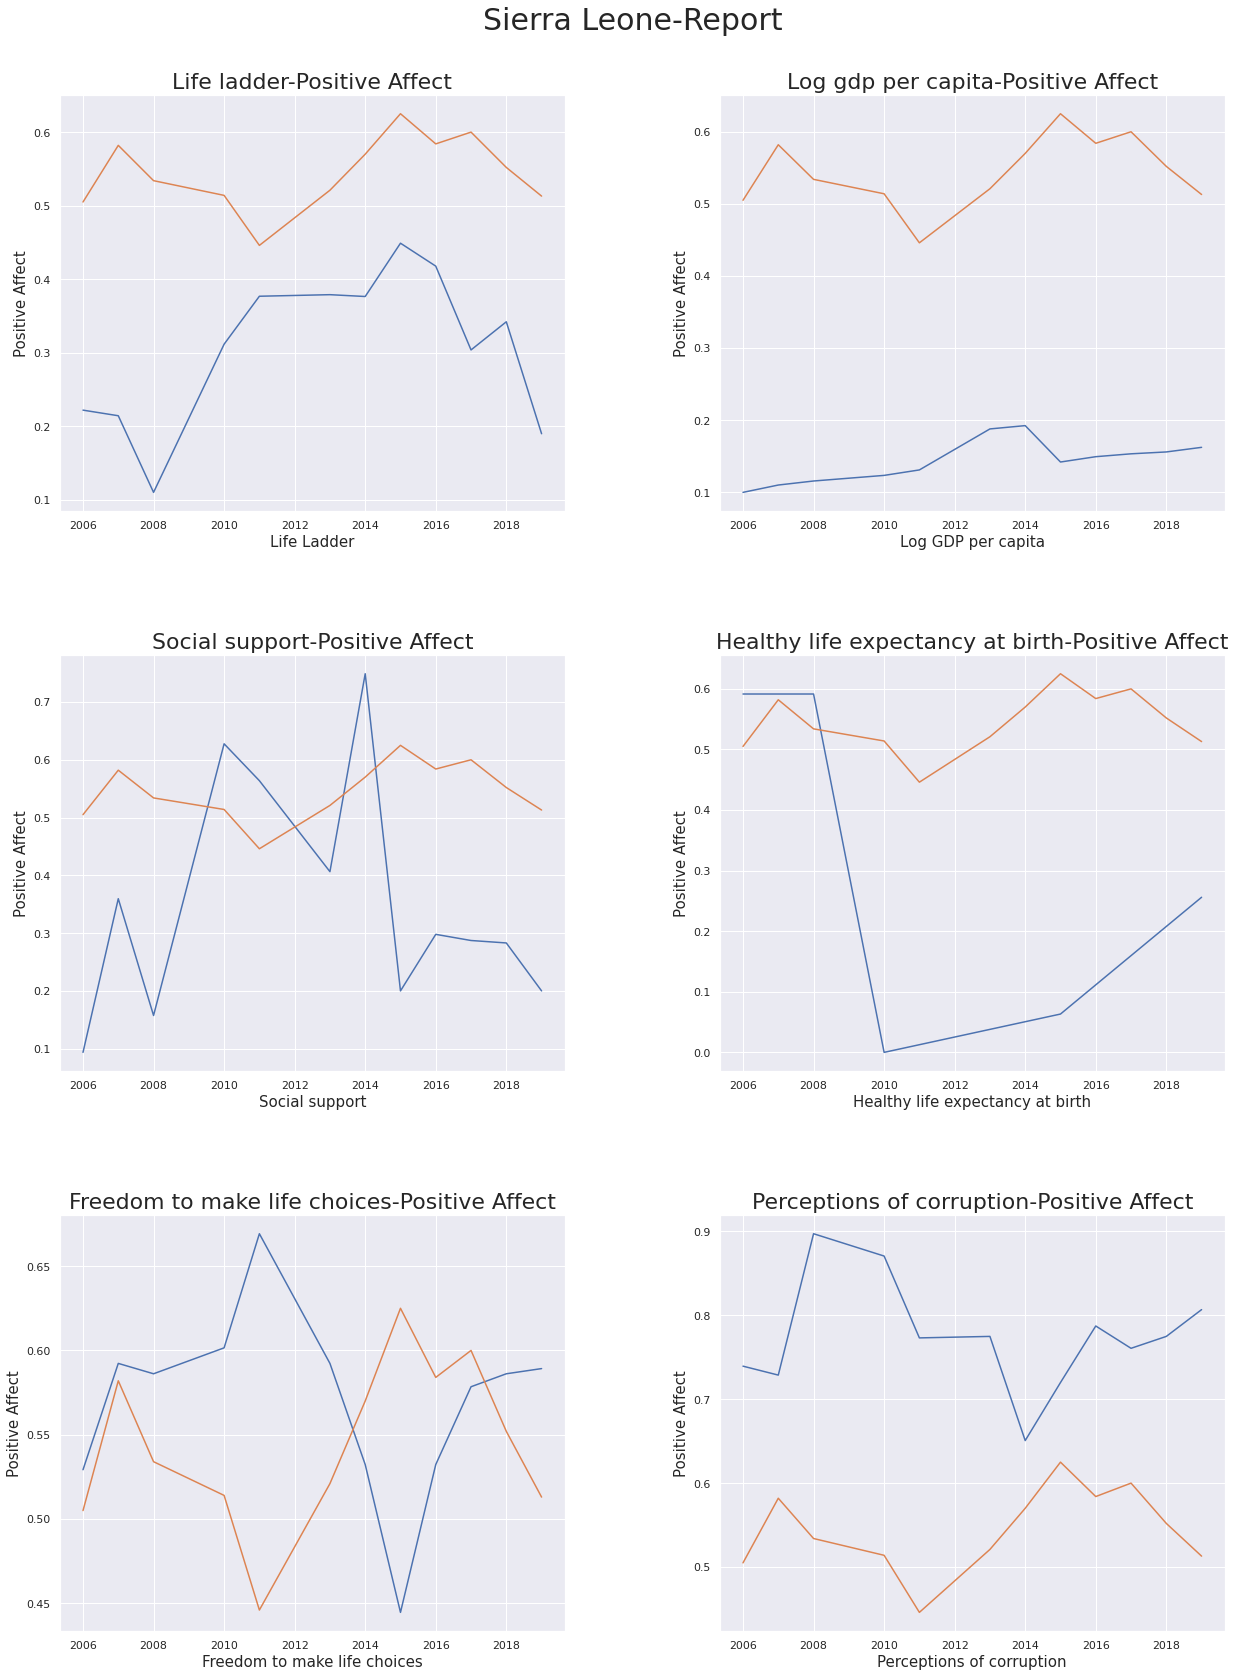

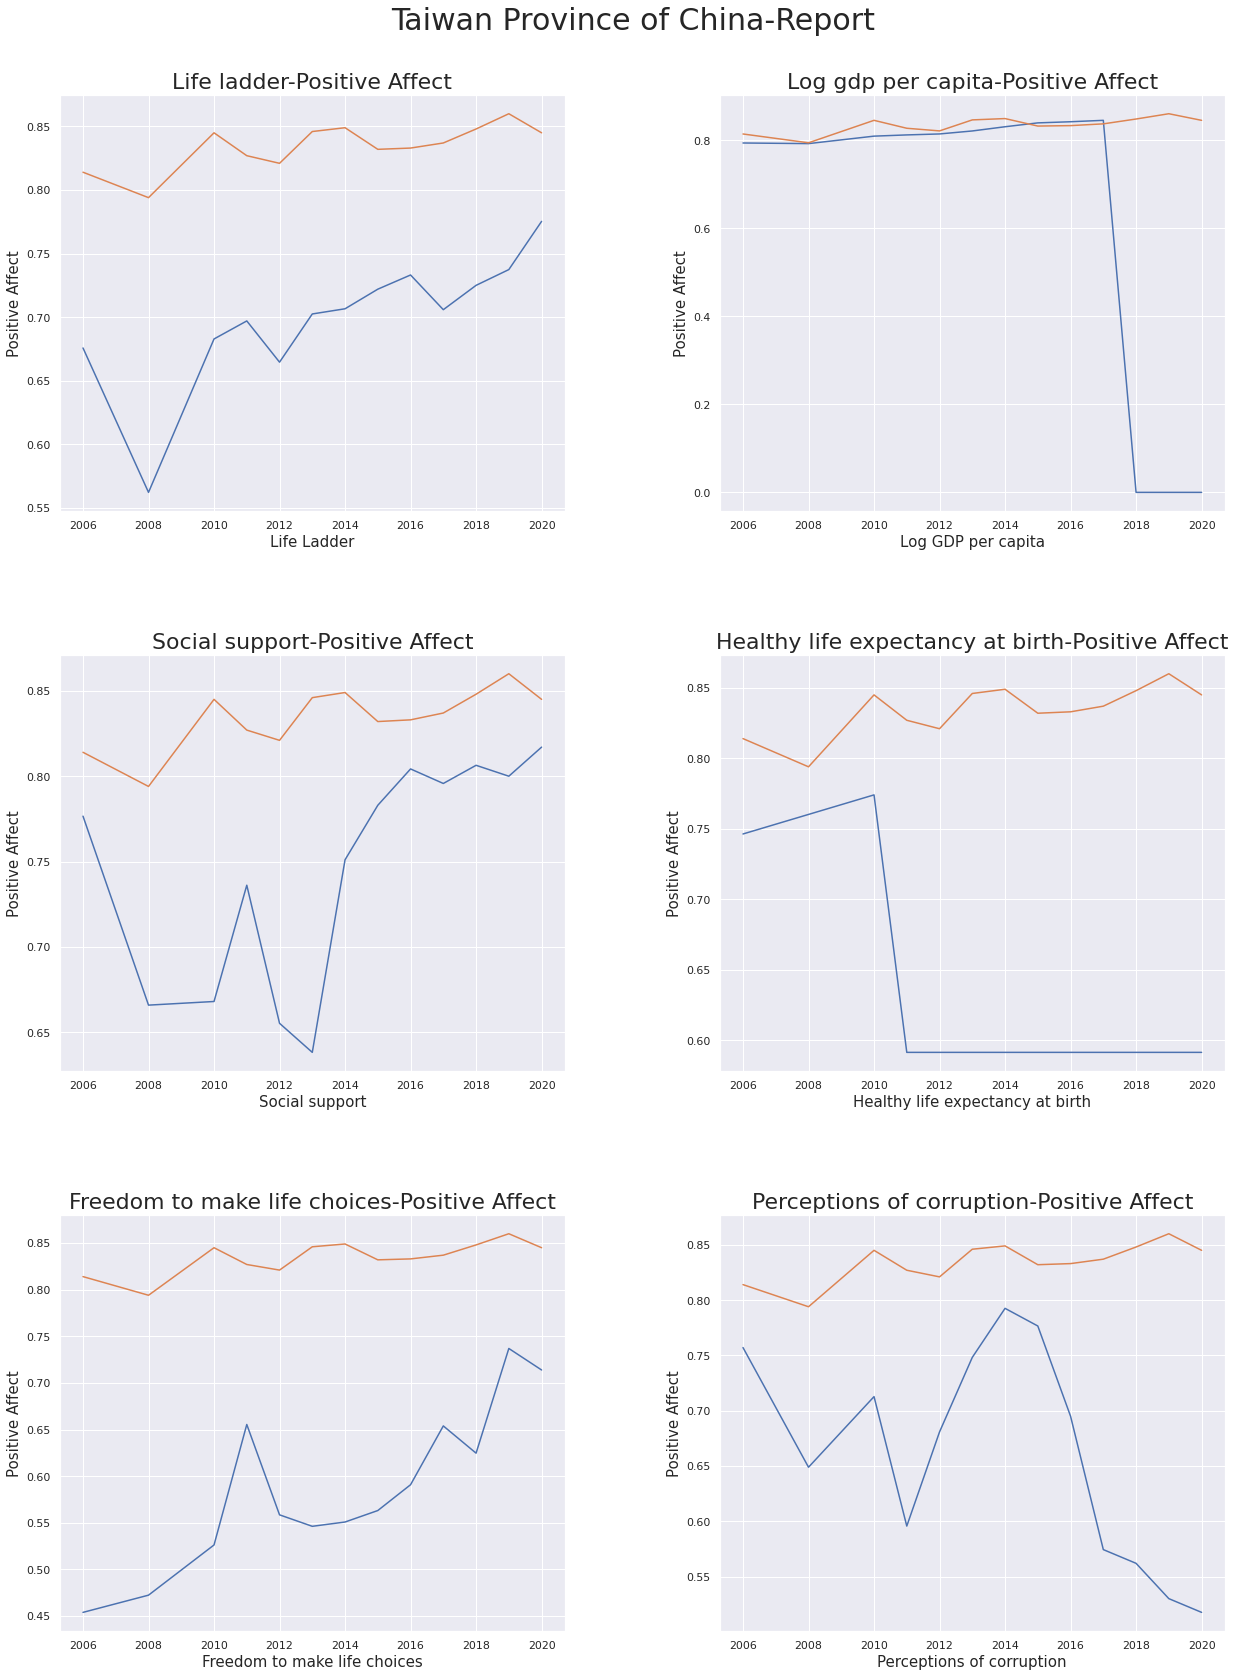

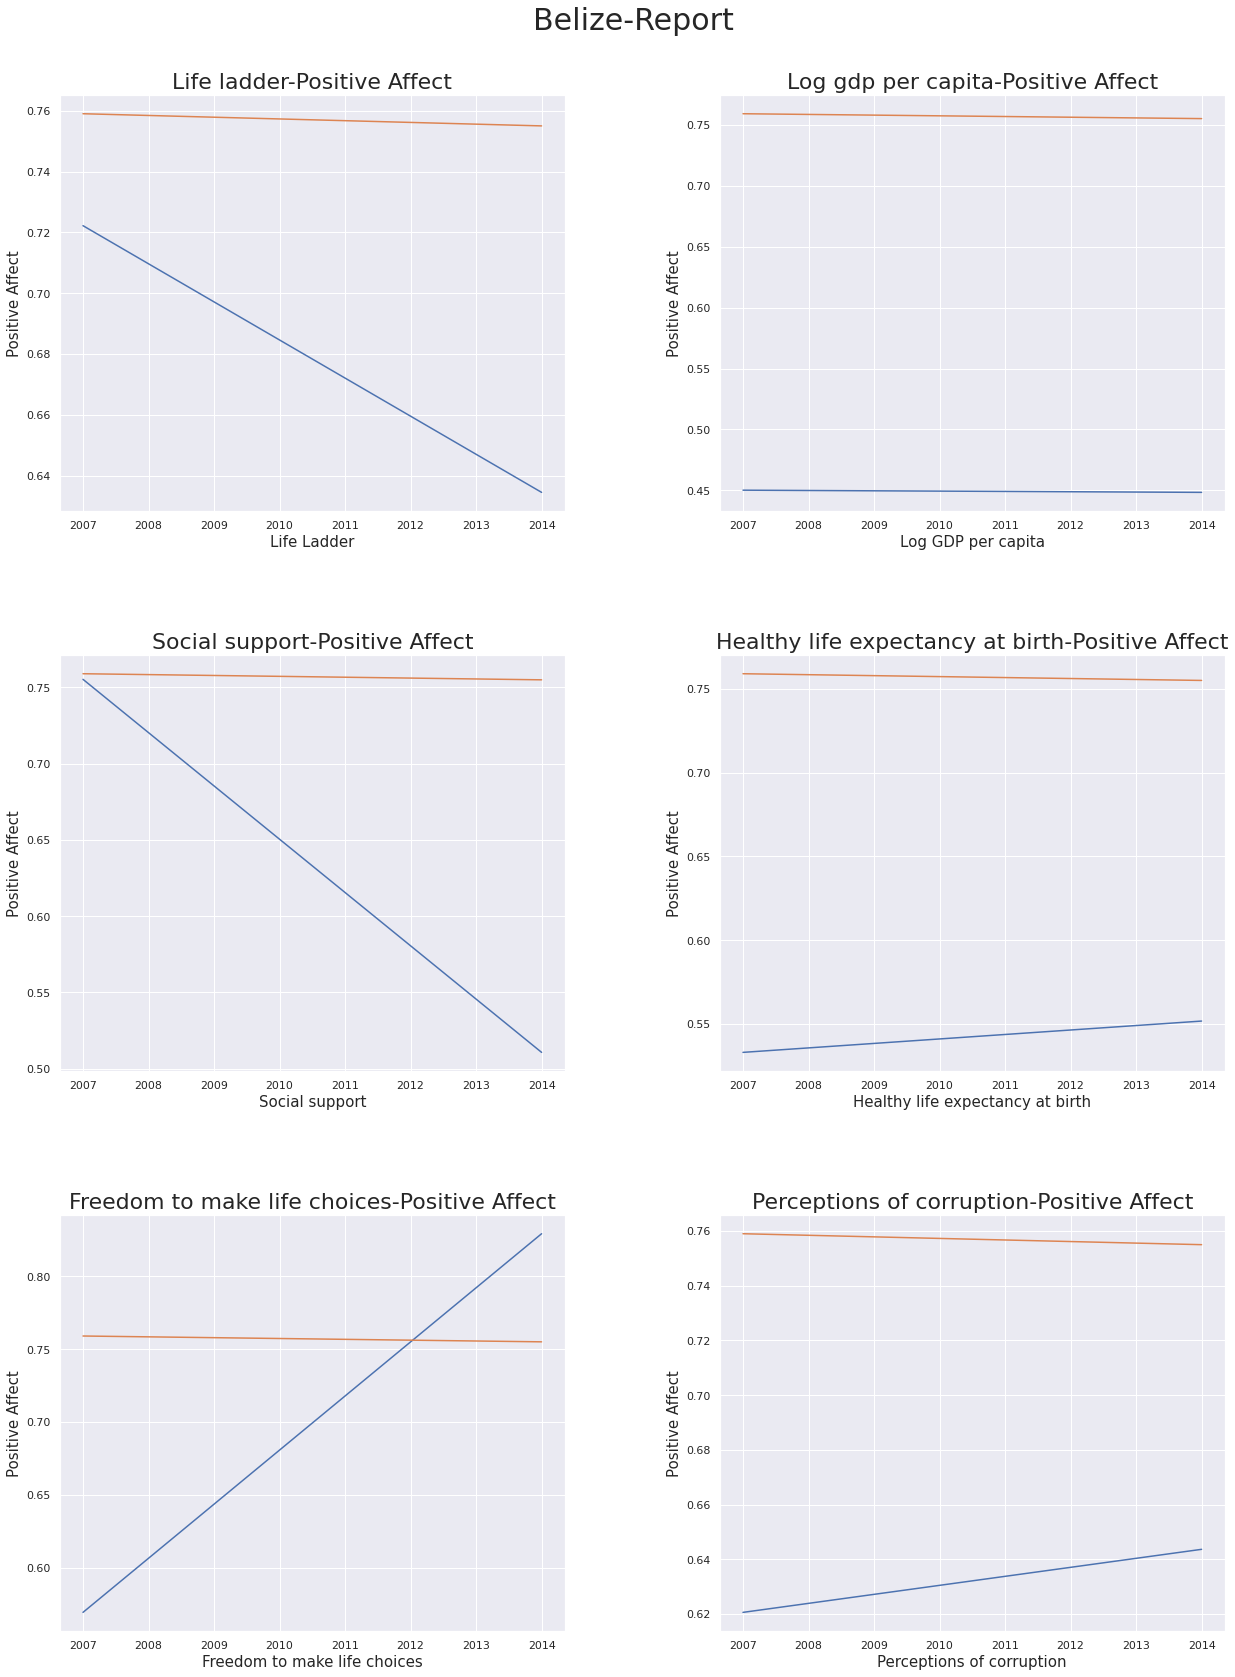

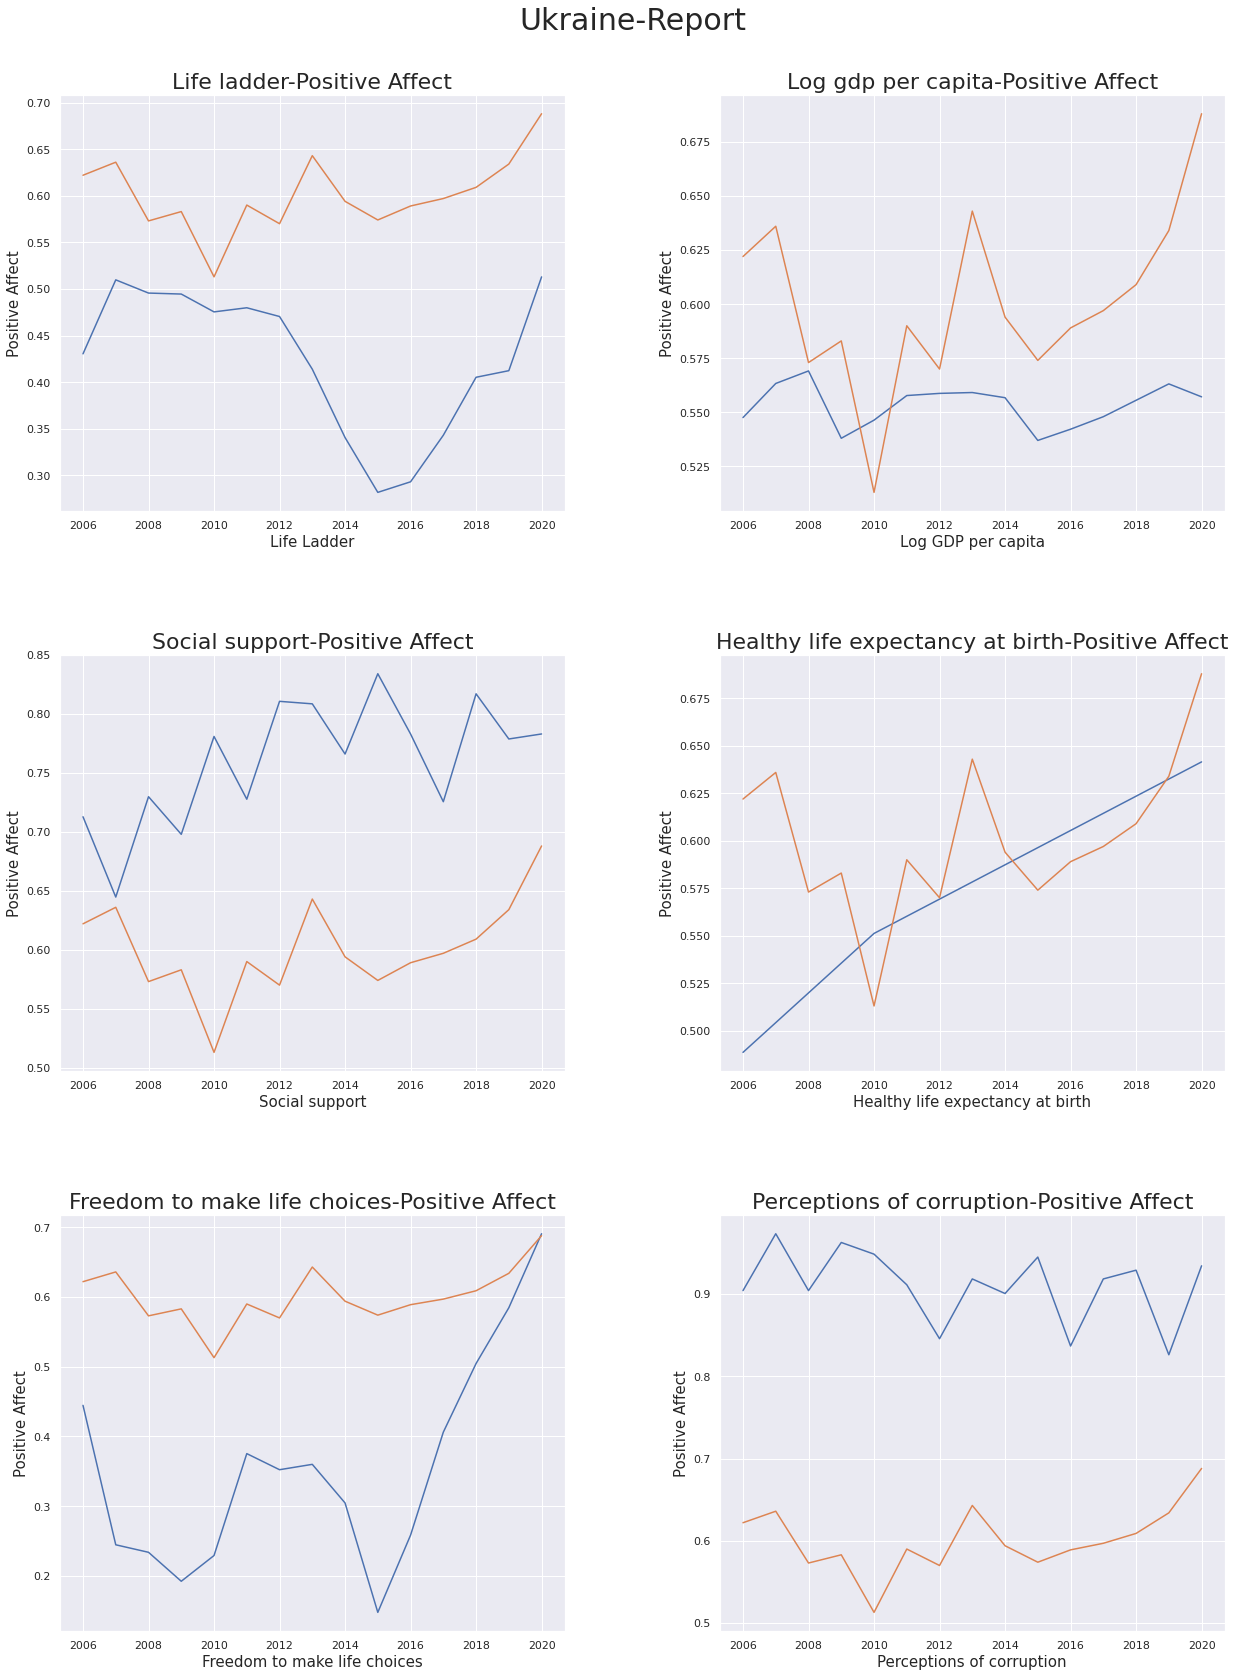

In [32]:
for country in all_countries[:4]:
  country_df = report_df[report_df["Country name"] == country]
  country_df = country_df.groupby("year").sum()

  f, axes = plt.subplots(3,2, figsize = (20,25))
  f.tight_layout(pad=12)
  f.suptitle(f"{country}-Report", fontsize=30)
  x_axis = 0
  y_axis = 0
  for col in report_columns:
    # country_df[[col, "Positive affect"]].plot()
    sns.lineplot(data=country_df, x="year",y=col, ax=axes[x_axis, y_axis])
    sns.lineplot(data=country_df, x="year",y="Positive affect", ax=axes[x_axis, y_axis])
    axes[x_axis,y_axis].set_xlabel(col, fontsize=15)
    axes[x_axis,y_axis].set_ylabel("Positive Affect", fontsize=15)
    axes[x_axis,y_axis].set_title(f"{col.capitalize()}-Positive Affect", fontsize=22)
    if y_axis == 1:
      y_axis = 0
      x_axis += 1
    else:
      y_axis += 1 

  plt.savefig(f"Plots/{country}-Report.png")

In [33]:
X=df_cleaned[['year','Life Ladder', 'Log GDP per capita',
              'Social support', 'Healthy life expectancy at birth',
              'Freedom to make life choices', 'Generosity',
              'Perceptions of corruption', 'Positive affect', 
              'Negative affect']]

In [34]:
melted_df = pd.melt(X, id_vars="year") 

In [35]:
melted_df

,year,variable,value
0,2008,Life Ladder,3.724
1,2009,Life Ladder,4.402
2,2010,Life Ladder,4.758
3,2011,Life Ladder,3.832
4,2012,Life Ladder,3.783
...,...,...,...
17536,2016,Negative affect,0.209
17537,2017,Negative affect,0.224
17538,2018,Negative affect,0.212
17539,2019,Negative affect,0.235


In [36]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17541 entries, 0 to 17540
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      17541 non-null  int64  
 1   variable  17541 non-null  object 
 2   value     17505 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 411.2+ KB


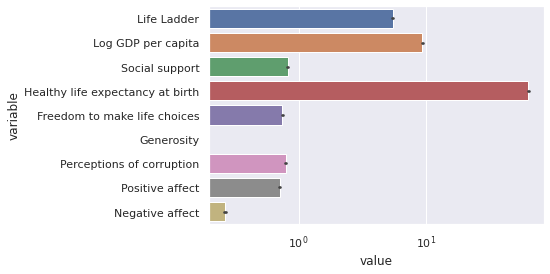

In [37]:
sns.barplot(y=melted_df.variable, x=melted_df.value).set_xscale('log')
plt.savefig("Plots/Variable_Value.png")

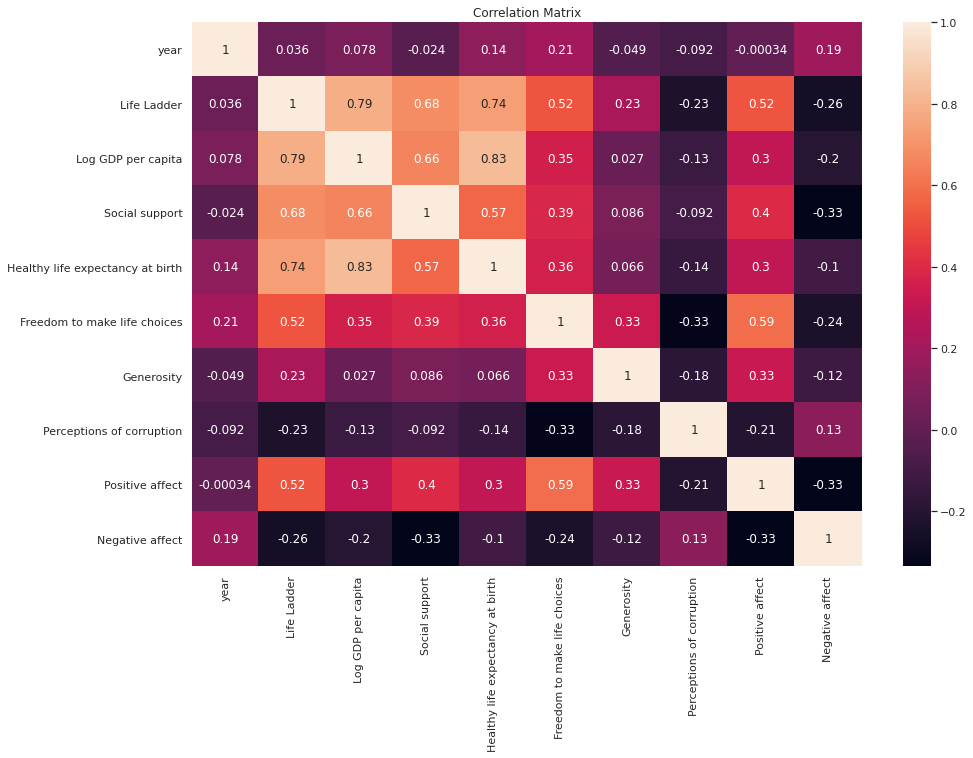

In [38]:
sns.set(rc={'figure.figsize':(15, 10)})
plt.title('Correlation Matrix')
sns.heatmap(df_cleaned.corr(), annot=True)  # heatmap() from sns library is used to plot the correlation matrix 

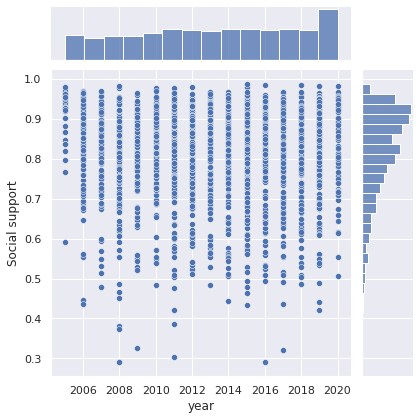

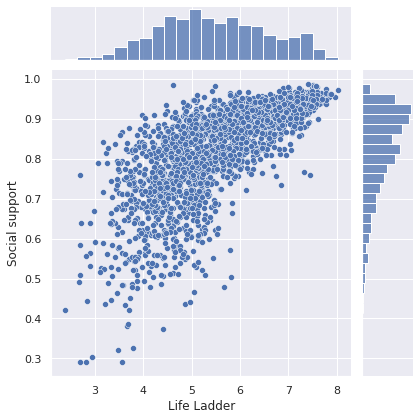

In [39]:
# Jointplot Examples
sns.jointplot(data=df, x="year", y="Social support")
sns.jointplot(data=df, x="Life Ladder", y="Social support")

# Exporting Reports as PDF

In [40]:
import os
from os import listdir, mkdir
from os.path import isfile, join

In [41]:
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)

['Variable_Value.png', 'Malta-Report.png', 'Vietnam-Report.png', 'Ukraine-Report.png', 'Taiwan Province of China-Report.png', 'Negative_Affect_Plot.png', 'Distribution_Before_Preprocessing.png', 'Singapore-Report.png', 'Distribution_Report.png', 'Malaysia-Report.png', 'Positive_Affect_Plot.png', 'Sierra Leone-Report.png', 'Belize-Report.png']


In [43]:
all_files = os.listdir("Plots/")
reports = [f"Plots/{file}" for file in all_files if file[file.find("-")+1:file.rfind(".")] == "Report"]
print(reports)

['Plots/Malta-Report.png', 'Plots/Vietnam-Report.png', 'Plots/Ukraine-Report.png', 'Plots/Taiwan Province of China-Report.png', 'Plots/Singapore-Report.png', 'Plots/Malaysia-Report.png', 'Plots/Sierra Leone-Report.png', 'Plots/Belize-Report.png']


In [44]:
!pip install FPDF

In [ ]:
from fpdf import FPDF

In [ ]:
WIDTH = 210
HEIGHT = 297

In [49]:
pdf = FPDF()
pdf.set_font("Arial", "B", 56)

pdf.add_page()
pdf.cell(45)
pdf.cell(WIDTH//2, HEIGHT//2, txt='REPORT', align='C')

pdf.add_page()

for report in reports:
  pdf.add_page()
  pdf.image(report, 0, 0, WIDTH)


pdf.output("Countries_Report.pdf", "F")

''

In [ ]:
os.system("rm -rf Plots")
os.system("mkdir Plots")